# CIENCIAS NATURALES Y TECNOLOGÍA

## Salto de lo clásico a lo cuántico
#### Autora: Angi Paola Jimenez Pira
#### 01/10/2019

En este documento jupyterNotebook se encuentra el desarrollo del proyecto, se presentan funciones que resuelven retos
 de programación propuestos en el libro guía del curso, capítulo 3 "Salto de lo clásico a lo cuántico" (secciones 3.1, 3.2 y 3.3). A cotinuación se presenta el nombre de cada función, su objetivo, la descrición de como usarla y su desarrollo.

Importación de librerias

In [14]:
import math
import numpy
import numpy as np
import matplotlib.pyplot as plt


A continuación se definirá la función **deterministaClasico** la cual calculará y prepresentará el estado del sistema después de ciertos clicks de tiempo. Para usar la función debe ingresar como parámetro una matriz booleana asociada a la forma en que se mueven las canícas, un vector que describe cuantas canícas se encuentran en cada vértice en el estado inicial y por ultimo el número de clicks de tiempo. 

In [15]:
def deterministaClasico(m, v, clicks):
    for i in range (len(m[0])):
        unos = 0
        for j in range (len(m)):
            if m[j][i] == [1,0]:
                unos +=1
        if unos != 1:
            print(unos)
            return False
    
    for t in range(clicks):
         v = multiplicacionMatrices(m, v)

    print('Vector estado final:', v)
    labels = []
    estado = []
    for i in range (len(v)):
        labels.append('Vertice '+str(i))
    for i in range (len(v)):
        estado.append(v[i][0][0])
    
    index = np.arange(len(labels))
    plt.bar(index, estado)
    plt.xlabel('Estado')
    plt.ylabel('Valor')
    plt.xticks(index, labels, rotation=90)
    plt.title('Evolución dinámica del sistema')
    plt.show()


Vector estado final: [[[0, 0]], [[0, 0]], [[1, 0]], [[7, 0]], [[2, 0]], [[21, 0]], [[5, 0]], [[0, 0]], [[4, 0]], [[0, 0]], [[3, 0]], [[5, 0]], [[0, 0]]]


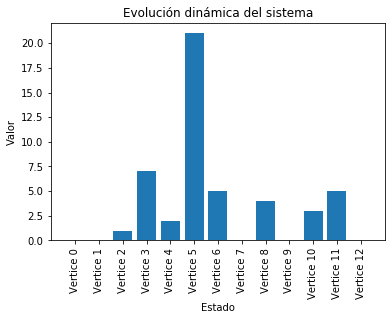

In [16]:
m  = [[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[1,0]], #0
     [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[1,0],[0,0],[0,0]], #1
     [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[1,0],[0,0]], #2 
     [[0,0],[0,0],[1,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #3
     [[0,0],[0,0],[0,0],[1,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #4 
     [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[1,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #5
     [[0,0],[0,0],[0,0],[0,0],[0,0],[1,0],[0,0],[0,0],[0,0],[1,0],[0,0],[0,0],[0,0]], #6
     [[0,0],[0,0],[0,0],[0,0],[1,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #7
     [[0,0],[1,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #8
     [[1,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #9
     [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[1,0],[0,0],[0,0],[0,0],[0,0]], #10
     [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[1,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #11
     [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]  #12
    ]

v = [[[10,0]],  #0
     [[4,0]],   #1
     [[1,0]],   #2
     [[7,0]],   #3
     [[2,0]],   #4
     [[2,0]],   #5
     [[11,0]],  #6
     [[0,0]],   #7
     [[3,0]],   #8
     [[1,0]],   #9
     [[0,0]],   #10
     [[5,0]],   #11
     [[2,0]]    #12
    ]
deterministaClasico(m,v,25)

Ahora se definirá la función **probabilistico** la cual retorna el vector resultante y la representación de este segun los datos ingresados. Para utilizarla debe ingresar como parámetro la matriz de los sistemas y los vectores iniciales asociados a estas. 


In [31]:
def probabilistico(Mp, Np, Ve, Ce, clicks):
    VE = productoTensor(Ve, Ce)
    ME = productoTensor(Mp, Np)
    
    for i in ME:
        print(i)
        
    for t in range(clicks):
         VE = multiplicacionMatrices(ME, VE)
    
    print('Vector estado final:', VE)
    labels = []
    estado = []
    for i in range(len(VE)):
        labels.append(str(i))
        estado.append(VE[i][0][0])
    
    index = np.arange(len(labels))
    plt.bar(index, estado)
    plt.xlabel('Estado')
    plt.ylabel('Valor')
    plt.xticks(index, labels, rotation=90)
    plt.title('Evolución dinámica del sistema')
    plt.show()

[[0, 0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.03333333333333333, 0.0], [0.16666666666666669, 0.0], [0.0, 0.0], [0.049999999999999996, 0.0], [0.25, 0.0], [0.0, 0.0], [0.08333333333333333, 0.0], [0.4166666666666667, 0.0]]
[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.06666666666666667, 0.0], [0.1, 0.0], [0.03333333333333333, 0.0], [0.09999999999999999, 0.0], [0.15, 0.0], [0.049999999999999996, 0.0], [0.16666666666666666, 0.0], [0.25, 0.0], [0.08333333333333333, 0.0]]
[[0.0, 0.0], [0.0, 0.0], [0, 0], [0.13333333333333333, 0.0], [0.06666666666666667, 0.0], [0.0, 0.0], [0.19999999999999998, 0.0], [0.09999999999999999, 0.0], [0.0, 0.0], [0.3333333333333333, 0.0], [0.16666666666666666, 0.0], [0.0, 0.0]]
[[0.0, 0.0], [0.049999999999999996, 0.0], [0.25, 0.0], [0.0, 0.0], [0.03333333333333333, 0.0], [0.16666666666666669, 0.0], [0.0, 0.0], [0.016666666666666666, 0.0], [0.08333333333333334, 0.0], [0.0, 0.0], [0.06666666666666667, 0.0], [0.33333333333333337, 0.0]]
[[0.09999999999999999, 0.0], [0.15, 0.

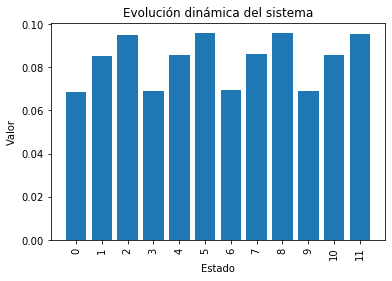

In [32]:
# Matriz de la dinámica para el sistema probabilístico A
MA = [[[0,0],[0.2,0],[0.3,0],[0.5,0]],
      [[0.3,0],[0.2,0],[0.1,0],[0.4,0]],
      [[0.4,0],[0.3,0],[0.2,0],[0.1,0]],
      [[0.3,0],[0.3,0],[0.4,0],[0,0]]
     ]

# Matriz de la dinámica para el sistema probabilístico B
MB = [[[0,0],[1/6,0],[5/6,0]], 
      [[1/3,0],[1/2,0],[1/6,0]], 
      [[2/3,0],[1/3,0],[0,0]] 
     ]

# Vector de estado inicial sistema probabilístico A
VA = [[[0.2,0]],[[0.1,0]],[[0.6,0]],[[0.1,0]]]

# Vector de estado inicial sistema probabilístico B
VB = [[[0.7,0]],[[0.15,0]],[[0.15,0]]]

probabilistico(MA,MB,VA,VB,5)

* Ahora, se definirá la función **doble rendija** la cual se encarga de calcular una matriz. esa matriz al cuadrado y el vector de estado final a partir de los datos ingresados como parámetros. Para utilizarla debe ingresar el número de rendijas, el número de blancos desde los que se puede acceder desde cada rendija y el vector de probabilidades.

In [19]:
def dobleRendija(numRendijas, numBlancos, probabilidad):
    for i in range (len(probabilidad)):
        probabilidad[i][0] = [modulo(probabilidad[i][0])**2,0]
        
    n = 2 * numBlancos + 1
    matriz = []
    k = 1
    cont = 0
    for i in range(n):
        fila = []
        for j in range(n):
            if(i == 0):
                fila.append([0,0])
            elif(i < numRendijas and j == 0):
                fila.append([1/(numRendijas-1),0])
            elif(j == k and i >= numRendijas):  
                cont+=1
                if (cont == 3 and i < n-1):
                    k +=1  
                    cont = 0
                    j+=1
                fila.append(probabilidad[cont-1][0])
            elif (i == j and i >= numRendijas):
                fila.append([1,0])
            else: 
                fila.append([0,0])
                
        matriz.append(fila)    

Ahora se definiran algunas funciones adicionales, extraidas del proyecto *Calculadora de numeros complejos* que son usadas en el desarrollo de este proyecto

In [20]:
def sumar (x , y):
    resultado  = [ (x[0]+y[0]) , (x[1]+y[1])]
    return resultado

In [21]:
def restar (x , y):
    resultado  = [ (x[0]-y[0]) , (x[1]-y[1])]
    return resultado

In [22]:
def multiplicar (x , y):
    resultado = [ (x[0]*y[0] - x[1]*y[1]) , (x[0]*y[1] + x[1]*y[0])] 
    return resultado

In [23]:
def modulo (x):
    resultado = (x[0]**2 + x[1]**2)**(1/2)
    if resultado != None:
        return resultado

In [24]:
def sumaVectores (v1, v2):
    if len(v1)== len(v2):
        resultado = []
        for i in range (len(v1)):
            resultado.append(sumar(v1[i], v2[i]))
        return resultado
    print("La longitud de los vectores debe ser igual")
    return False

In [25]:
def escalarPorVector(k, v):
    resultado = []
    for i in range(len(v)):
        temp = multiplicar ( v[i], k)
        resultado.append(temp)
    return resultado

In [26]:
def productoEscalar(v1,v2):
    if len(v1) == len(v2):
        resultado = [0,0]
        for i in range (len(v1)):
            temp = multiplicar(v1[i],v2[i])
            resultado = sumar(resultado,temp)
        return resultado
    print("La longitud de los vectores debe ser igual")
    return False

In [27]:
def multiplicacionMatrices (m1, m2):
    if len(m1[0]) == len(m2):
        resultado = []
        for i in range(len(m1)):
            fila = []
            for j in range(len(m2[0])):
                suma = [0,0]
                for c in range(len(m1[0])):
                    suma = sumar(suma, multiplicar(m1[i][c] , m2[c][j]))
                fila.append(suma)
            resultado.append(fila)
        return resultado
    print("El número de columnas de la primera matriz debe ser igual al número de filas de la segunda")
    return False

In [12]:
def escalarPorMatriz(k,m):
    resultado = []
    for i in range(len(m)):
        resultado.append(escalarPorVector(k,m[i]))
    return resultado

In [13]:
def productoTensor(m1,m2):
    temp = []
    for i in m1:
        for j in i:
            temp.append(escalarPorMatriz(j,m2))
            
    f = len(m1)*len(m2)
    c = len(m1[0])*len(m2[0])
    resultado =[]
    for i in range(f):
        curr = []
        for j in range(c):
            curr.append(0)
        resultado.append(curr)
    fil = 0
    col = 0
    for i in range(len(temp)):
        for a in range(len(temp[i])):
            for b in range (len(temp[i][a])):
                c1= i * len(m2[0]) + b 
                if c1 > c-1:
                    col = c1 % c
                else:
                    col = c1
            
                fil= c1//c  *len(m2) + a
                resultado [fil][col] = temp[i][a][b]
    return resultado